In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

from activation import *
from loss import *
from linear import *
from utils import * 

In [2]:
# Générer les données

X_train, y_train = generate_artificial_data(center=1, sigma=0.1, nbex=1000, epsilon=0.1)
X_test, y_test = generate_artificial_data(center=1, sigma=0.1, nbex=1000, epsilon=0.1)

y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))


# hyperparamètres
input_dim  = X_train.shape[1]
hidden_dim = 10
output_dim = 1
gradient_step = 1e-4
epoch = 1000

# couches
layer1 = Linear(input_dim, hidden_dim)
layer2 = Linear(hidden_dim, output_dim)

# loss
lossmse = MSELoss()
llosse = []

# activation
sig = Sigmoid()
tanh = TanH()

# train
for i in tqdm(range(epoch)):

    # forward
    out_lin = layer1.forward(X_train)
    out_tan = tanh.forward(out_lin)
    out_lin2 = layer2.forward(out_tan)
    out_sig = sig.forward(out_lin2)
    loss = lossmse.forward(y_train, out_sig)
    llosse.append(loss.mean())

    # backward
    loss_back = lossmse.backward(y_train, out_sig)
    delta_sig = sig.backward_delta(out_lin2, loss_back)
    delta_lin2 = layer2.backward_delta(out_tan, delta_sig)
    delta_tan = tanh.backward_delta(out_lin, delta_lin2)
    delta_lin = layer1.backward_delta(X_train, delta_tan)
    # update des gradients
    layer2.backward_update_gradient(out_tan, delta_sig)
    layer1.backward_update_gradient(X_train, delta_tan)
    layer2.update_parameters(gradient_step=gradient_step)
    layer1.update_parameters(gradient_step=gradient_step)
    layer1.zero_grad()
    layer1.zero_grad()


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 890.06it/s]


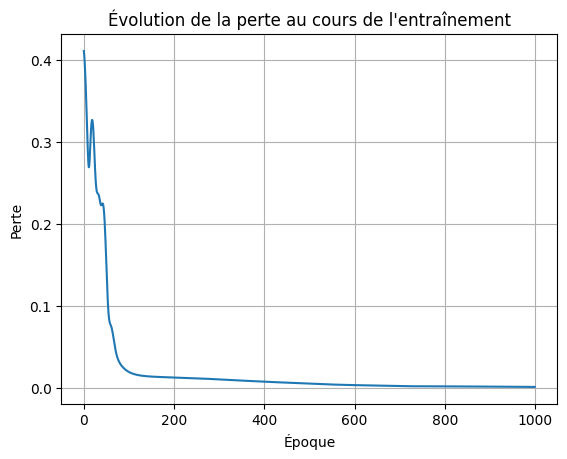

In [3]:
plot_loss(llosse)

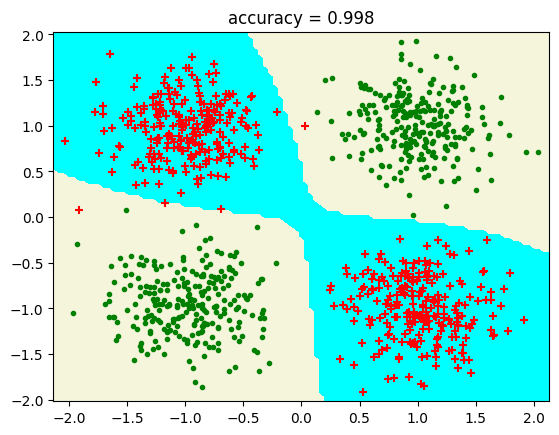

In [4]:
def predict(inputs):
    output = layer1.forward(inputs)
    output = tanh.forward(output)
    output = layer2.forward(output)
    output = sig.forward(output)
    return np.where(output >= 0.5, 1, 0)

def accuracy(X_test, y_test):
    return np.where(y_test == predict(X_test), 1, 0).mean()


acc = accuracy(X_test,y_test)
plt.figure()
plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("accuracy = "+str(acc))
plt.show()